In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
%matplotlib inline 

In [18]:
cab_data=pd.read_csv("D:\case study\My Uber Drives - 2016.csv")
print(cab_data)
rides_data=pd.read_csv("D:\case study\cab_ride\cab_rides.csv")
print(rides_data)

           START_DATE*         END_DATE* CATEGORY*            START*  \
0       1/1/2016 21:11    1/1/2016 21:17  Business       Fort Pierce   
1        1/2/2016 1:25     1/2/2016 1:37  Business       Fort Pierce   
2       1/2/2016 20:25    1/2/2016 20:38  Business       Fort Pierce   
3       1/5/2016 17:31    1/5/2016 17:45  Business       Fort Pierce   
4       1/6/2016 14:42    1/6/2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                 STOP*   MILES*         PURPOSE*  
0          Fort Pierce      5.1   Meal/Entertain  
1          Fort Pierce      5.0  

In [19]:
cab_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [21]:
rides_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [22]:
import datetime
rides_data['datetime']=pd.to_datetime(rides_data['time_stamp'])
rides_data


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223
...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1970-01-01 00:25:43.708385534
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1970-01-01 00:25:43.708385534
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,1970-01-01 00:25:43.708385534
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1970-01-01 00:25:43.708385534


In [24]:
cab_data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [25]:
rides_data.shape

(693071, 11)

In [26]:
cab_data.shape

(1156, 7)

In [27]:
cab_data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [28]:
rides_data.describe()

,distance,time_stamp,price,surge_multiplier,datetime
count,693071.000000,6.930710e+05,637976.000000,693071.000000,693071
mean,2.189430,1.544046e+12,16.545125,1.013870,1970-01-01 00:25:44.045709764
min,0.020000,1.543204e+12,2.500000,1.000000,1970-01-01 00:25:43.203646318
25%,1.280000,1.543444e+12,9.000000,1.000000,1970-01-01 00:25:43.443968356
50%,2.160000,1.543737e+12,13.500000,1.000000,1970-01-01 00:25:43.737477529
75%,2.920000,1.544828e+12,22.500000,1.000000,1970-01-01 00:25:44.827508976
max,7.860000,1.545161e+12,97.500000,3.000000,1970-01-01 00:25:45.160510943
std,1.138937,6.891925e+08,9.324359,0.091641,NaN


In [29]:
#to join both the data and get a single table
a=pd.concat([cab_data,rides_data])

In [30]:
a.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [34]:
a.fillna(0,inplace=True)

C:\Users\DRISHTI TIWARI\AppData\Local\Temp\ipykernel_11860\1902534521.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  a.fillna(0,inplace=True)


In [36]:
a.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0


In [37]:
a.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'distance', 'cab_type', 'time_stamp', 'destination',
       'source', 'price', 'surge_multiplier', 'id', 'product_id', 'name',
       'datetime'],
      dtype='object')

In [39]:
a.groupby('cab_type').count()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime
cab_type,,,,,,,,,,,,,,,,,
0,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


<Axes: xlabel='cab_type'>

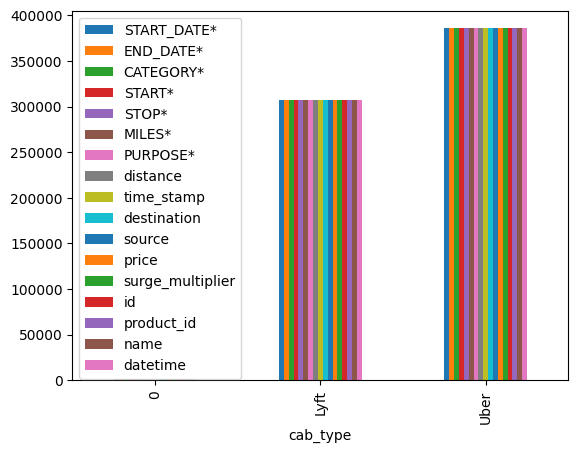

In [40]:
a.groupby('cab_type').count().plot.bar()

<Axes: xlabel='price'>

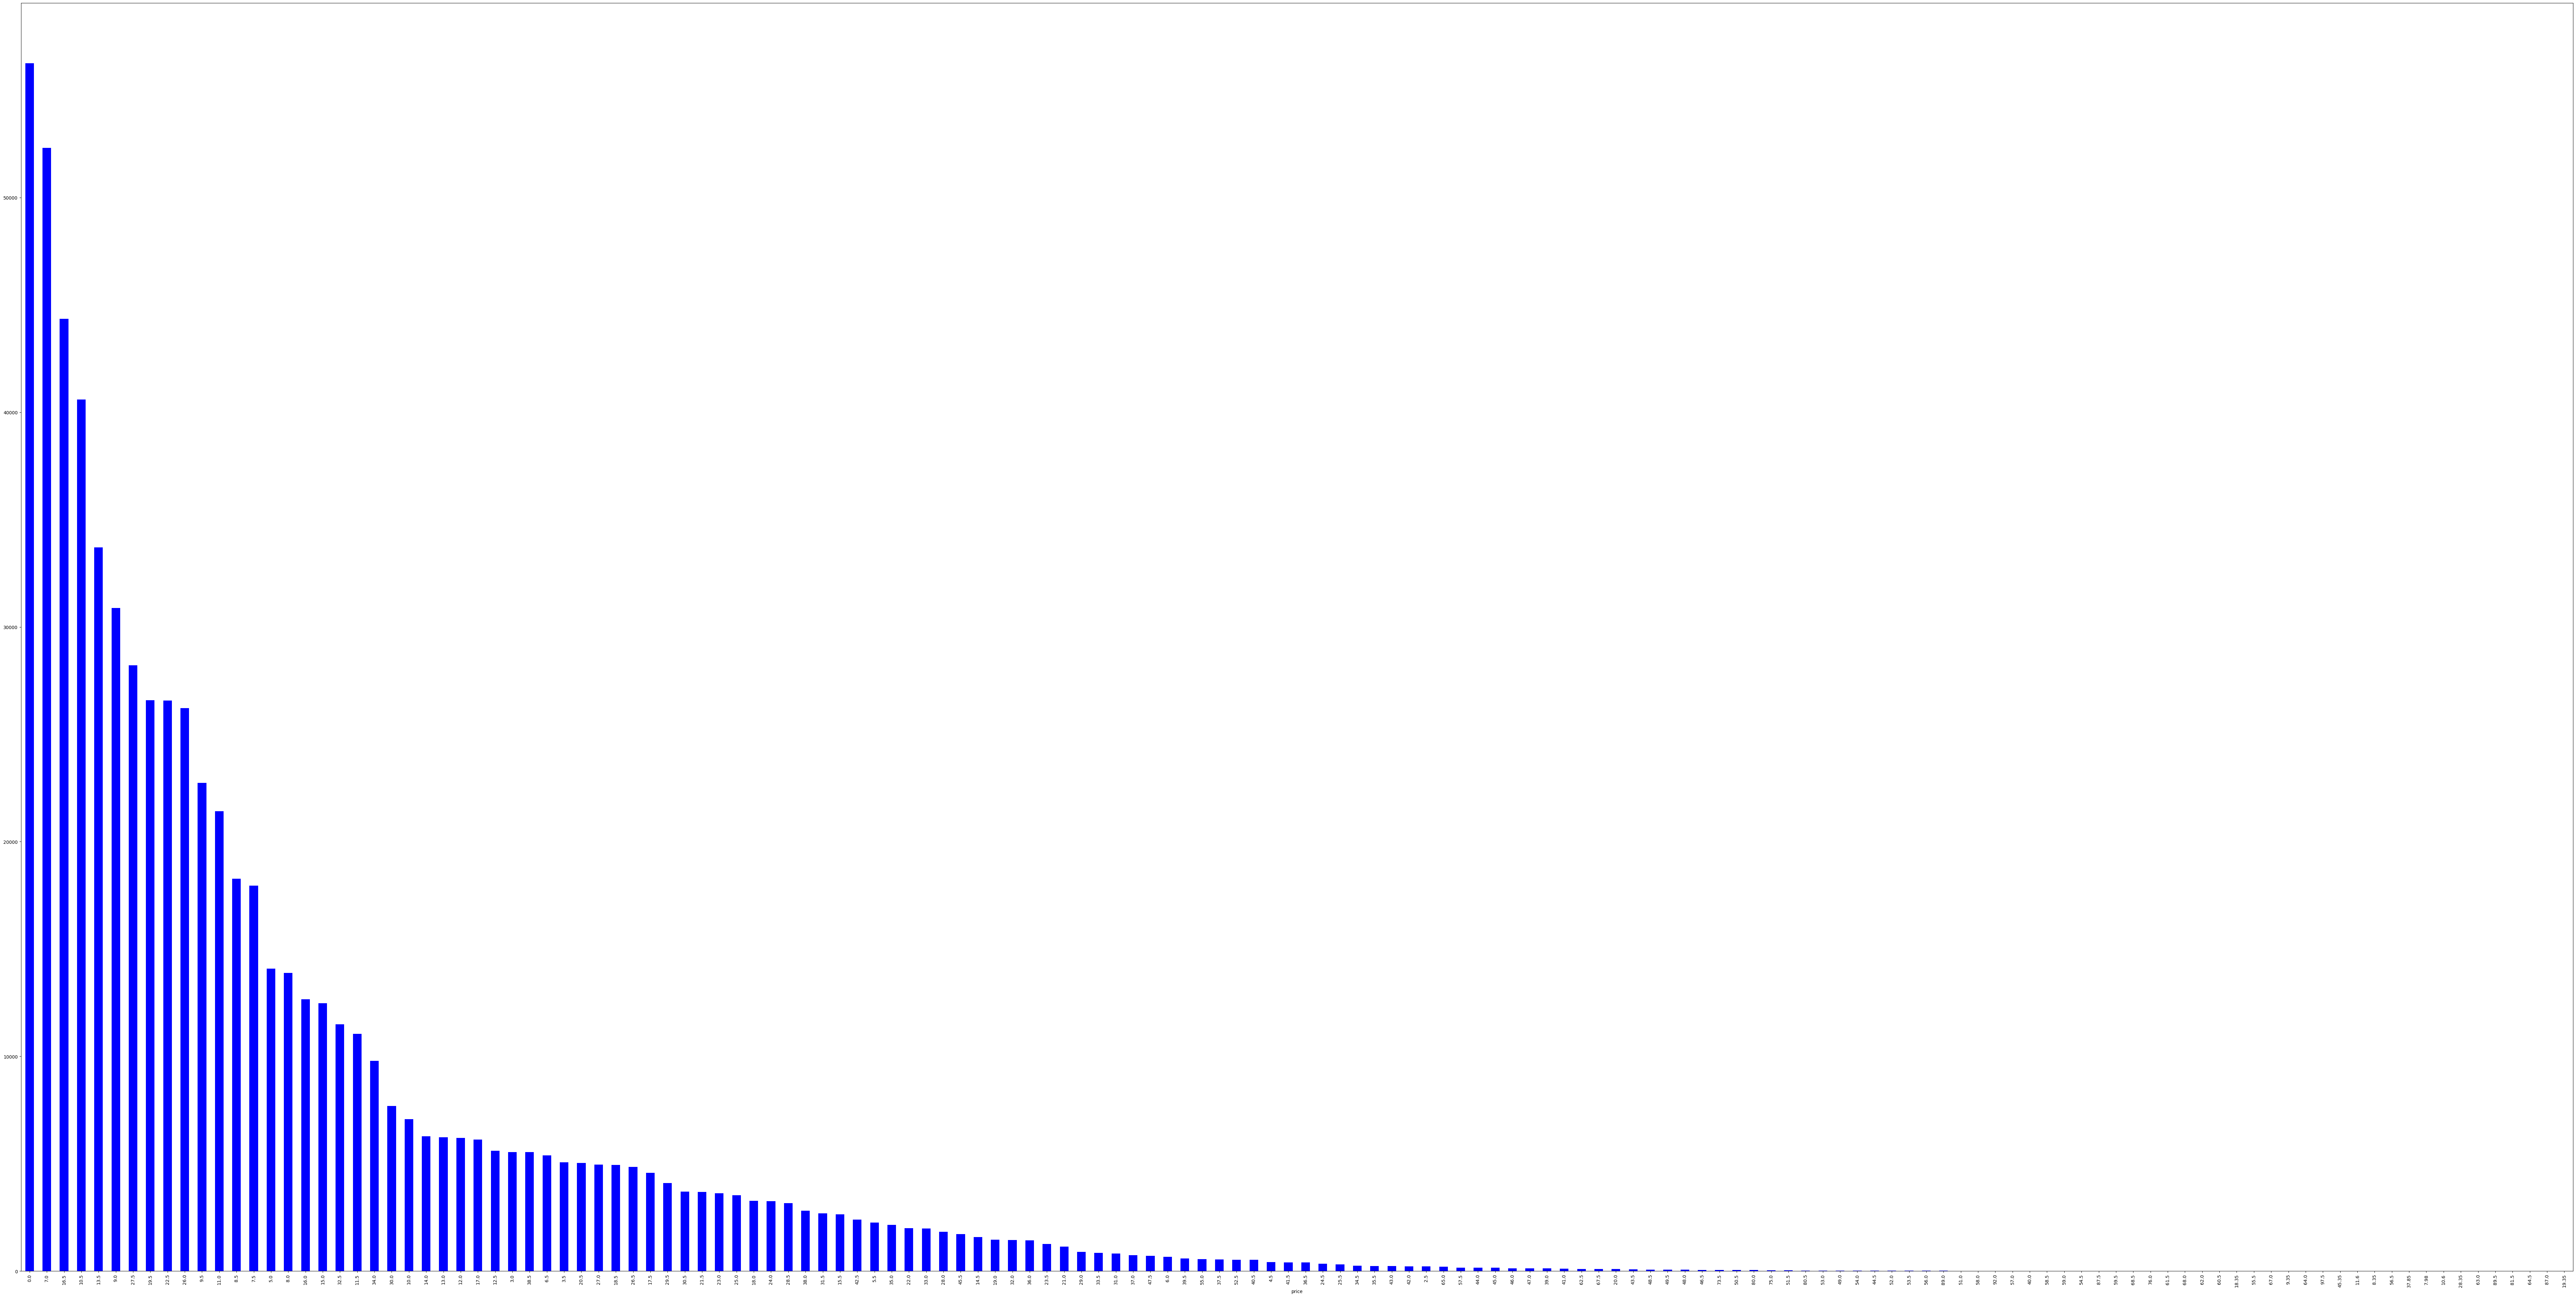

In [41]:
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color='blue')

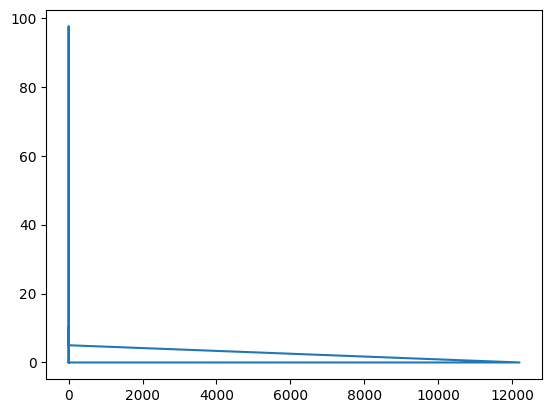

In [52]:
x=a['MILES*']
y=a['price']
plt.plot(x,y)
plt.show()

In [67]:
x1=a[('MILES*')]
y1=a['distance']

In [68]:
#using skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
#split the data into training and testing sets
x_train, y_train, x_test, y_test=train_test_split(x1,y1,test_size=0.25,random_state=40)

In [82]:
# printing the shapes of the new X objects 
print(x_train.shape) 
print(x_test.shape) 
  
# printing the shapes of the new y objects 
print(y_train.shape) 
print(y_test.shape)

(520670,)
(520670,)
(173557,)
(173557,)


In [86]:
df=pd.DataFrame({'Actual':y_test})
df

,Actual
344902,3.25
16105,2.80
266036,1.97
574509,0.56
343268,2.32
...,...
399824,5.28
3410,1.34
594045,1.10
543668,1.78


In [87]:
df.head()

,Actual
344902,3.25
16105,2.80
266036,1.97
574509,0.56
343268,2.32


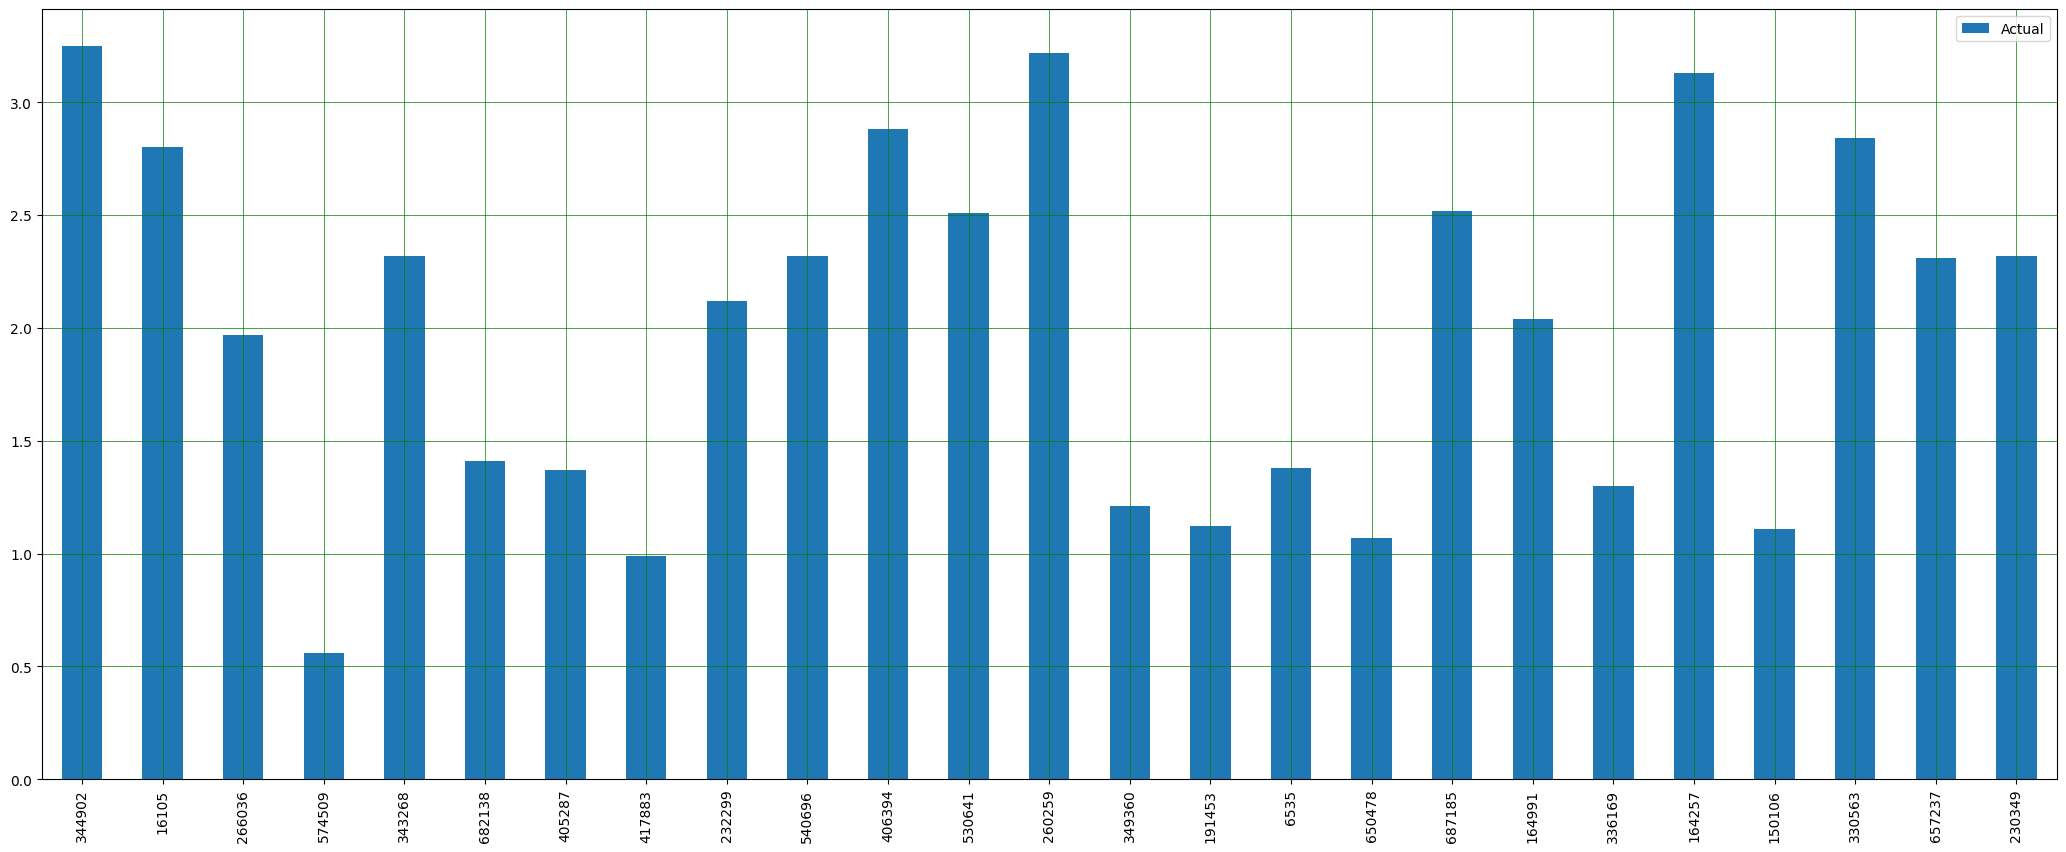

In [88]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [ ]:
 cv